In [1]:
from galprep import *
%matplotlib inline

In [2]:
path = "output_00"
output='106'
data = galprep(path, output)

{'a': 1.0, 'omegaM0': 1.0, 'omegaL0': 0.0, 'h': 0.01, 'boxsize': Unit("3.20e+02 kpc"), 'time': Unit("1.44e+00 kpc s km**-1")}
1406.3477550069247


### Fiddling with truncation wavenumber:

/home/st9792/.conda/envs/myenv/lib/python3.9/site-packages/astropy/units/quantity.py:611: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/st9792/.conda/envs/myenv/lib/python3.9/site-packages/astropy/units/quantity.py:611: RuntimeWarning: overflow encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/st9792/.conda/envs/myenv/lib/python3.9/site-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step


(0.001, 1e+40)

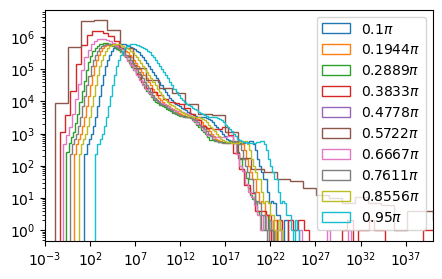

In [3]:
def kL(theta, data):
    MA = data.gas['M_A0']
    mi = con.m_p
    me = con.m_e
    beta = data.gas['beta']
    coeff = 4 * MA**4 * mi / (np.pi * me * beta) * np.cos(theta)**2 / np.sin(theta)**4
    return coeff * np.exp(2*me/(beta*mi*np.cos(theta)**2))

THETA = [np.pi/6, np.pi / 4, np.pi, 3 * np.pi / 4, 2*np.pi]
THETA = np.linspace(0.1, 0.95, 10) * np.pi
labels = ['$\\frac{1}{6}$','$\\frac{1}{4}$','','$\\frac{3}{4}$','2']
plt.figure(figsize=(5,3))
for i, theta in enumerate(THETA):
    # print(i, theta/np.pi)
    kLs = kL(theta,data)
    kLs = kLs.value
    plt.hist(kLs, histtype='step', label='{}$\\pi$'.format(np.round(theta/np.pi,4)), 
             bins=np.logspace(np.log10(kLs.min()), np.log10(kLs.max()), 100))
    
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-3, 1e40)

/tmp/ipykernel_3521724/1565855554.py:9: RuntimeWarning: invalid value encountered in double_scalars
  kL[beta>1] = x[beta>1] * (1 - 3 * zeta ** 2)**(-4/3)
/tmp/ipykernel_3521724/1565855554.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  kL[beta<1] = x[beta<1] * (1 - zeta ** 2)**(-2/3)


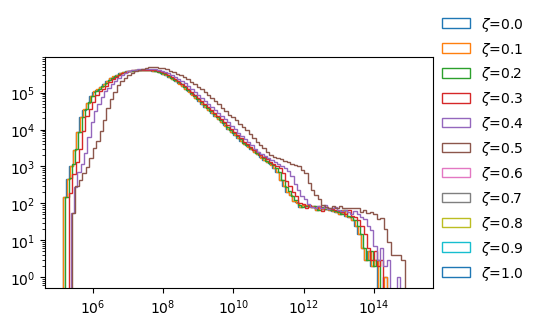

In [4]:
def kLWIM(zeta, data=data):
    dV = data.gas['M_A0'] * data.gas['v_a']
    L = data.gas['smooth']
    eta = 1 # !! ??
    x = (6 * data.gas['rho'] * dV ** 2 * L / (eta * data.gas['v_a']))**(2/3)
    beta = data.gas['beta']
    kL = np.zeros(len(L))
    kL[beta<1] = x[beta<1] * (1 - zeta ** 2)**(-2/3)
    kL[beta>1] = x[beta>1] * (1 - 3 * zeta ** 2)**(-4/3)
    
    return kL

ZETA = np.linspace(0,1,11)
plt.figure(figsize=(5,3))
for i, zeta in enumerate(ZETA):
    #print(i, zeta)
    kLs = kLWIM(zeta,data)
    plt.hist(kLs, histtype='step', label='$\zeta$={}'.format(np.round(zeta,1)), 
             bins=np.logspace(np.log10(kLs.min()), np.log10(kLs.max()), 100))
    
plt.legend(loc='lower left', bbox_to_anchor= (1.01, 0.0), ncol=1,
            borderaxespad=0, frameon=False)
plt.xscale('log')
plt.yscale('log')
#plt.xlim(1e-3, 1e40)

In [5]:
def larmor_freq(data):
    Omega = (con.e.to('C') * 1 * data.gas['B_norm'] * u.Gauss / (2 * con.m_p)).to('Hz').value
    
    return Omega

def rigidity(data):
    '''
    Calculates rigidity of CRs associated with each cell
    '''
    omega = larmor_freq(data)
    v_CR, _, _, _ = CR_velocity(data)
    L = data.gas['smooth'].in_units('km')
    R = v_CR / (L * omega)
    
    return R

In [6]:
R = rigidity(data)
plt.hist(R, bins=np.logspace(-13, 26, 100));
plt.xscale('log')

NameError: name 'CR_velocity' is not defined

In [ ]:
costheta = np.linspace(0,1,20)
sintheta = np.sqrt(1-costheta**2)
kmaxL = 4 * data.gas['M_A0'] * con.m_p / np.pi / con.m_e * np.exp(2*con.m_e/data.gas['beta'] / con.m_p)